In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [14]:
unemp=pd.read_csv("NYC_umploymentRate.csv")

In [28]:
unemp=unemp.ix[:, 0:7] #only select first seven useful columns

,﻿YEAR,Labor Force,Employment,Emp/Pop,Unemployed,Unemp Rate,LFPART
1,Jan-76,"3,117.2","2,771.1",48.7,346.1,11.1,54.7
2,Feb-76,"3,114.7","2,770.0",48.7,344.7,11.1,54.7
3,Mar-76,"3,112.6","2,768.8",48.7,343.8,11.0,54.7
4,Apr-76,"3,111.6","2,767.9",48.7,343.7,11.0,54.7
5,May-76,"3,112.0","2,767.2",48.7,344.8,11.1,54.7


In [29]:
unemp.info()
unemp=unemp.dropna(subset=['\ufeffYEAR'])
unemp['Date'] = pd.to_datetime(unemp['\ufeffYEAR'], format="%b-%y")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 1 to 504
Data columns (total 7 columns):
﻿YEAR          504 non-null object
Labor Force    494 non-null object
Employment     494 non-null object
Emp/Pop        494 non-null object
Unemployed     494 non-null object
Unemp Rate     494 non-null object
LFPART         494 non-null object
dtypes: object(7)
memory usage: 31.5+ KB


In [31]:
unemp['Year'] = unemp['Date'].map(lambda x: x.year )
unemp['Month'] = unemp['Date'].map(lambda x: x.month )

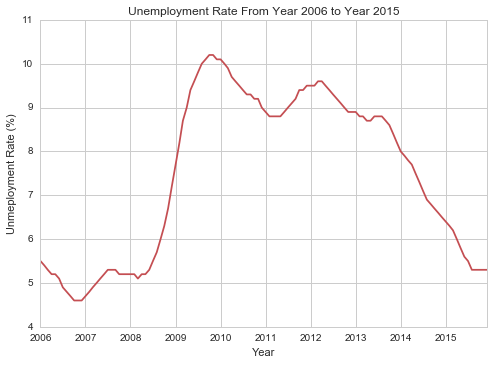

In [53]:
select_range=unemp[(unemp['Year']>=2006)&(unemp['Year']<=2015)]
plt.plot_date(x=select_range['Date'], y=select_range['Unemp Rate'], fmt="r-")
plt.title("Unemployment Rate From Year 2006 to Year 2015")
plt.xlabel("Year")
plt.ylabel("Unmeployment Rate (%)")
plt.savefig("unemploymentRate.jpeg")
plt.show()